<a href="https://colab.research.google.com/github/chosunghyun18/kaggle/blob/master/titanic_tutorial_for_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# test colab
print("Hello worlrd")

Hello worlrd


In [12]:
# header
#데이터 처리
import numpy as np
import pandas as pd

#시각화
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns 
plt.style.use('seaborn-whitegrid')
import missingno

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
#서포트 백터 머신;/
from xgboost import XGBClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

import sys
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import  drive

drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
!ls

drive  sample_data


In [21]:
test = pd.read_csv('/content/drive/My Drive/Titanic_data/test.csv')
train = pd.read_csv('/content/drive/My Drive/Titanic_data/train.csv')

In [22]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#ready for merges file 
ntrain= train.shape[0]
ntest= test.shape[0]

y_train = train['Survived'].values
passId = test['PassengerId']


data = pd.concat((train,test))

print("data size is :{}".format(data.shape))

data size is :(1309, 12)


In [25]:
ntrain

891

In [28]:
ntest

418

In [29]:
passId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

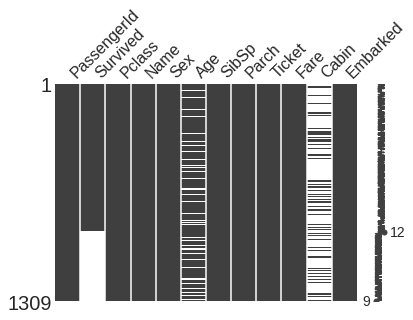

In [30]:
missingno.matrix(data,figsize=(6,4))

In [33]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [34]:
data.isna().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

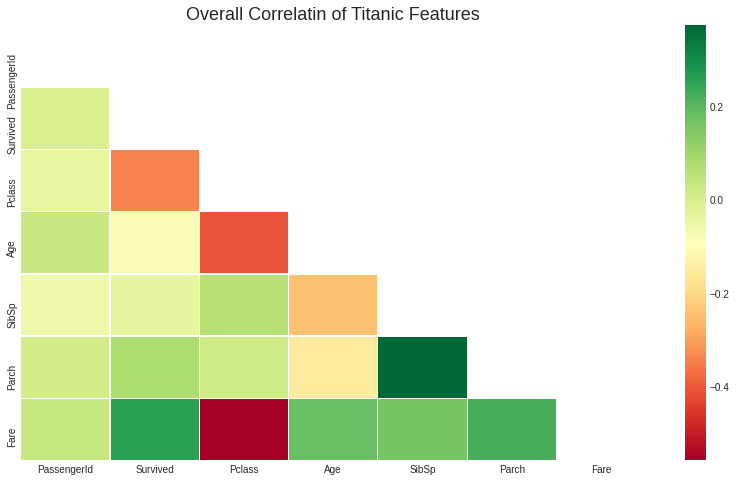

In [40]:
#co-relation matrix
corr= data.corr()
mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(14,8))
plt.title('Overall Correlatin of Titanic Features', fontsize=18)
           
sns.heatmap(corr, mask=mask,annot=False ,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
plt.show()